# IRIS FLOWER CLASSIFICATION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv(r"C:\Users\RIYA GUPTA\Downloads\IRIS.csv")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
data.drop(['sepal_width','petal_width'],axis=1,inplace=True)

In [10]:
data

,sepal_length,petal_length,species
0,5.1,1.4,Iris-setosa
1,4.9,1.4,Iris-setosa
2,4.7,1.3,Iris-setosa
3,4.6,1.5,Iris-setosa
4,5.0,1.4,Iris-setosa
...,...,...,...
145,6.7,5.2,Iris-virginica
146,6.3,5.0,Iris-virginica
147,6.5,5.2,Iris-virginica
148,6.2,5.4,Iris-virginica


# DATA VISUALISATION

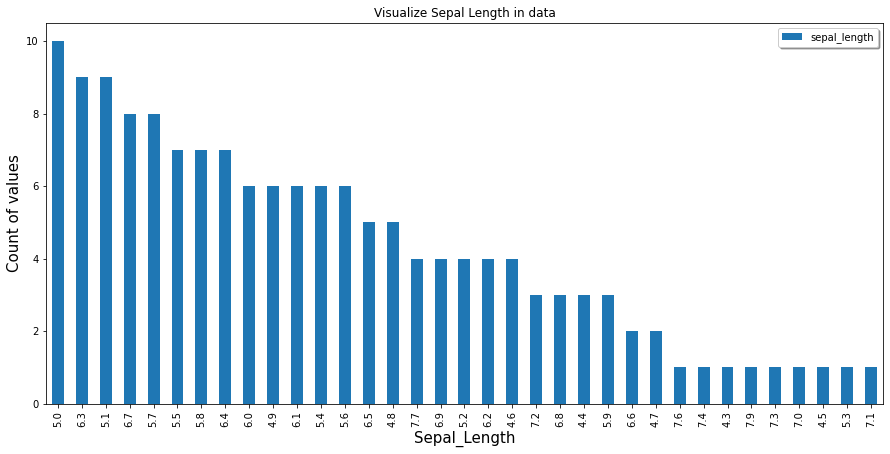

In [12]:
# Visualising Sepal Lenth col using bar chart
plt.figure(figsize=(15,7)) 
data['sepal_length'].value_counts().plot(kind='bar',title='Visualize Sepal Length in data')
plt.xlabel('Sepal_Length',{'size':15})
plt.ylabel('Count of values',{'size':15})
plt.legend(frameon=True,shadow=True)
plt.show()

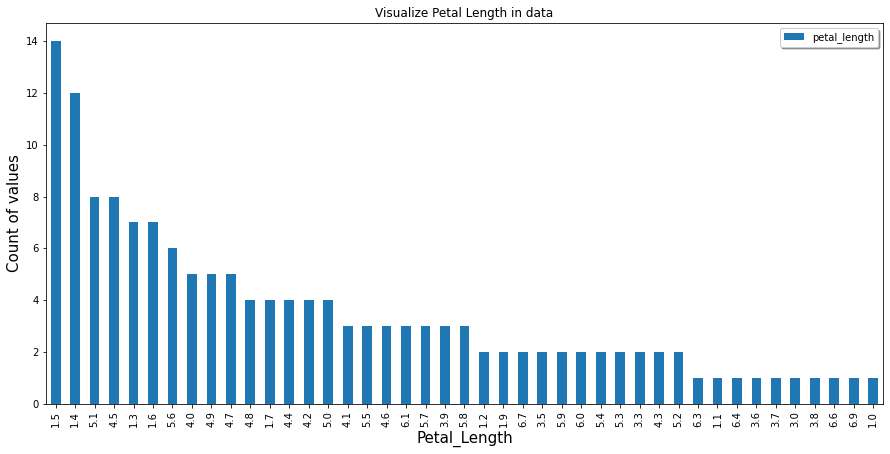

In [14]:
# Visualising Petal Lenth col using bar chart
plt.figure(figsize=(15,7)) 
data['petal_length'].value_counts().plot(kind='bar',title='Visualize Petal Length in data')
plt.xlabel('Petal_Length',{'size':15})
plt.ylabel('Count of values',{'size':15})
plt.legend(frameon=True,shadow=True)
plt.show()

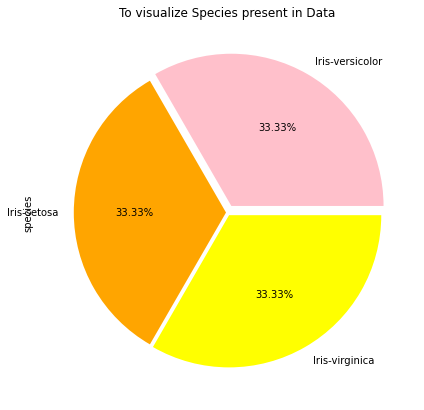

In [18]:
# Visualizing species column using pie chart
plt.figure(figsize=(15,7))
l=data['species'].value_counts()
l.plot(kind='pie',explode=[0.05,0.01,0.02],labels=['Iris-versicolor','Iris-setosa','Iris-virginica'],
                             colors=['pink','orange','yellow'],
                             autopct='%1.2f%%',title='To visualize Species present in Data')
plt.show()

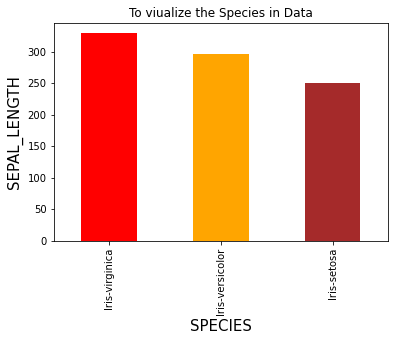

In [20]:
# visualize Sepal Length and Species using Bar plot
data.groupby(['species'])['sepal_length'].sum().sort_values(ascending=False).plot(kind='bar',color=['red','orange','brown'],title="To viualize the Species in Data")
plt.xlabel("SPECIES",{'size':15})
plt.ylabel("SEPAL_LENGTH",{'size':15})
plt.show()

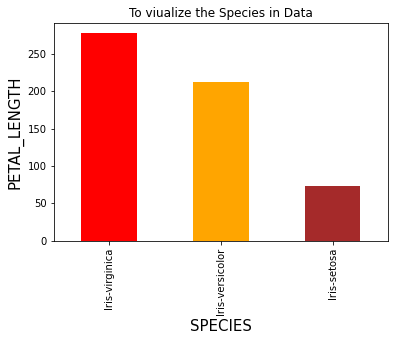

In [21]:
# visualize Petal Length and Species using Bar plot
data.groupby(['species'])['petal_length'].sum().sort_values(ascending=False).plot(kind='bar',color=['red','orange','brown'],title="To viualize the Species in Data")
plt.xlabel("SPECIES",{'size':15})
plt.ylabel("PETAL_LENGTH",{'size':15})
plt.show()

# APPLY DECISION TREE CLASSIFIER 

In [22]:
X=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)

print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of X_train:  (120, 2)
Shape of X_test:  (30, 2)
Shape of y_train:  (120,)
Shape of y_test:  (30,)


In [24]:
from sklearn.tree import DecisionTreeClassifier
cls=DecisionTreeClassifier(criterion='gini',random_state=41)   #or entropy
cls.fit(X_train,y_train)

DecisionTreeClassifier(random_state=41)

In [25]:
y_pred=cls.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score
results=confusion_matrix(y_test,y_pred)
print('Confusion matrix: ')
print(results)
print('Accuracy Score: ',accuracy_score(y_test,y_pred))

Confusion matrix: 
[[ 9  0  0]
 [ 0 10  1]
 [ 0  1  9]]
Accuracy Score:  0.9333333333333333


# APPLY RANDOM FOREST CLASSIFIER

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
cls=RandomForestClassifier(n_estimators=10,criterion='gini',random_state=41)
cls.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=41)

In [29]:
y_pred=cls.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score
results=confusion_matrix(y_test,y_pred)
print('Confusion matrix: ')
print(results)
print('Accuracy Score: ',accuracy_score(y_test,y_pred))

Confusion matrix: 
[[ 9  0  0]
 [ 0 10  1]
 [ 0  1  9]]
Accuracy Score:  0.9333333333333333
